# $$\text{Обработка датасета "Disease-Symptom Dataset"}$$

$$\text{Работа выполнена студентом 2 курса СПбГУ Лысенко Л. М.}$$
$$\text{по направлению "ИИиНоД" в рамках курсовой работы}$$

$Ссылка~на~датасет:$ https://www.kaggle.com/datasets/dhivyeshrk/diseases-and-symptoms-dataset

$\text{Импортируем библиотеки для работы с данными датасета:}$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

$\text{Загружаем исходный датасет:}$

In [ ]:
raw_dataset = pd.read_csv("Final_Augmented_dataset_Diseases_and_Symptoms.csv")

$\text{Смотрим первые пять строк и вспомним info:}$

In [4]:
raw_dataset.head()

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246945 entries, 0 to 246944
Columns: 378 entries, diseases to neck weakness
dtypes: int64(377), object(1)
memory usage: 712.2+ MB


$\text{Имеется 49 симптомов, которые никогда не встречаются:}$

In [6]:
# Посмотрим на эти симптомы
zero_symptoms = raw_dataset.iloc[:, 1:].columns[raw_dataset.iloc[:, 1:].sum() == 0]
zero_symptoms

Index(['pus in sputum', 'underweight', 'arm cramps or spasms',
       'abnormal appearing tongue', 'pallor', 'shoulder cramps or spasms',
       'joint stiffness or tightness', 'eye strain', 'pus in urine',
       'abnormal size or shape of ear', 'elbow cramps or spasms',
       'feeling hot and cold', 'nailbiting', 'hip swelling',
       'foot or toe cramps or spasms', 'low back swelling', 'hip lump or mass',
       'feet turned in', 'elbow stiffness or tightness', 'mass on ear',
       'throat irritation', 'swollen tongue', 'disturbance of smell or taste',
       'discharge in stools', 'pupils unequal', 'sleepwalking',
       'skin oiliness', 'knee cramps or spasms', 'posture problems',
       'bleeding in mouth', 'tongue bleeding',
       'change in skin mole size or color', 'polyuria',
       'infrequent menstruation', 'mass on vulva', 'jaw pain',
       'eyelid retracted', 'elbow lump or mass', 'tongue pain',
       'low back stiffness or tightness',
       'skin on head or neck l

$\text{Они не вносят вклада в определение заболевания и могут усложнить работу будущей модели машинного обучения.}$
$\text{Удалим их из датасета:}$

In [7]:
raw_dataset = raw_dataset.drop(columns=zero_symptoms)

$\text{В датасете оказалось два столбца с практически идентичными названиями: "regurgitation" и "regurgitation.1"}$
$\text{Рассмотрим их подробнее:}$

$\text{Количество единиц в "regurgitation":}$

In [8]:
raw_dataset["regurgitation"].sum()

np.int64(2490)

$\text{Количество единиц в "regurgitation.1":}$

In [9]:
raw_dataset["regurgitation.1"].sum()

np.int64(4170)

$\text{Проведем подробный анализ путем рассмотрения паттернов различия данных симптомов:}$

In [10]:
# Подробный анализ
diff_mask = raw_dataset["regurgitation"] != raw_dataset["regurgitation.1"]
diff_rows = raw_dataset[diff_mask]

print("Детальный анализ различий:")
print(f"Всего различных строк: {len(diff_rows)}")

if len(diff_rows) > 0:
    # Анализируем паттерны различий
    patterns = diff_rows[["regurgitation", "regurgitation.1"]].value_counts()
    print("\nПаттерны различий:")
    for pattern, count in patterns.items():
        print(
            f"  regurgitation={pattern[0]}, regurgitation.1={pattern[1]}: {count} строк"
        )

Детальный анализ различий:
Всего различных строк: 1680

Паттерны различий:
  regurgitation=0, regurgitation.1=1: 1680 строк


In [11]:
# Есть ли случаи, где regurgitation=1, а regurgitation.1=0?
reverse_conflict = raw_dataset[
    (raw_dataset["regurgitation"] == 1) & (raw_dataset["regurgitation.1"] == 0)
]
print(f"Обратных случаев: {len(reverse_conflict)}")

Обратных случаев: 0


$\text{Имеется ассиметричное отношение:}$

$\text{1. "regurgitation.1" всегда включает случаи "regurgitation"}$

$\text{2. "regurgitation" НЕ включает все случаи "regurgitation.1"}$

$\text{Вывод: скорее всего, "regurgitation.1" - это более точная/специфичная версия симптома}$

$\text{Удалим "regurgitation" и переименуем "regurgitation.1" на "regurgitation"}$:

In [12]:
raw_dataset = raw_dataset.drop("regurgitation", axis=1)

raw_dataset = raw_dataset.rename(columns={"regurgitation.1": "regurgitation"})

$\text{Займемся проблемой дисбаланса классов.}$

$\text{Основные проблемы, котрые необходимо решить:}$

$\text{1. Обеспечение разнообразия классов;}$

$\text{2. Получение большей точности для дальнейшего обучения ML-модели;}$

$\text{3. Сохранение качества данных;}$

$\text{4. Удовлетворение нужд пользователей;}$

$\text{Рассмотрим распределение заболеваний по количеству случаев с разными минимальными порогами:}$ $\text{1, 10, 30, 50, 80, 100, 120, 150 и 200}$

In [86]:
disease_counts = raw_dataset["diseases"].value_counts()

print("Распределение заболеваний по количеству случаев:")

for threshold in [1, 10, 30, 50, 80, 100, 120, 150, 200]:
    count = sum(disease_counts >= threshold)
    percent = count / len(disease_counts) * 100
    print(
        f">= {threshold:2d} случаев заболевания: Сохраняем {count:3d} заболевания(ий) ({percent:5.1f}%)"
    )

Распределение заболеваний по количеству случаев:
>=  1 случаев заболевания: Сохраняем 773 заболевания(ий) (100.0%)
>= 10 случаев заболевания: Сохраняем 677 заболевания(ий) ( 87.6%)
>= 30 случаев заболевания: Сохраняем 582 заболевания(ий) ( 75.3%)
>= 50 случаев заболевания: Сохраняем 527 заболевания(ий) ( 68.2%)
>= 80 случаев заболевания: Сохраняем 475 заболевания(ий) ( 61.4%)
>= 100 случаев заболевания: Сохраняем 443 заболевания(ий) ( 57.3%)
>= 120 случаев заболевания: Сохраняем 429 заболевания(ий) ( 55.5%)
>= 150 случаев заболевания: Сохраняем 402 заболевания(ий) ( 52.0%)
>= 200 случаев заболевания: Сохраняем 361 заболевания(ий) ( 46.7%)


$\text{Рассмотрим потери при разных порогах:}$ $\text{1, 10, 30, 50, 80, 100, 120, 150 и 200}.$

In [94]:
def accurate_threshold_count(df, threshold):
    disease_counts = df["diseases"].value_counts()
    count_above = sum(disease_counts >= threshold)
    count_below = sum(disease_counts < threshold)
    return count_above, count_below


# Проверим все пороги
print("Потери при разных порогах N:")

thresholds = [1, 10, 30, 50, 80, 100, 120, 150, 200]
for threshold in thresholds:
    above, below = accurate_threshold_count(raw_dataset, threshold)
    print(f"N = {threshold:3d}: {above:3d} заболеваний (теряем {below:3d} классов)")

Потери при разных порогах N:
N =   1: 773 заболеваний (теряем   0 классов)
N =  10: 677 заболеваний (теряем  96 классов)
N =  30: 582 заболеваний (теряем 191 классов)
N =  50: 527 заболеваний (теряем 246 классов)
N =  80: 475 заболеваний (теряем 298 классов)
N = 100: 443 заболеваний (теряем 330 классов)
N = 120: 429 заболеваний (теряем 344 классов)
N = 150: 402 заболеваний (теряем 371 классов)
N = 200: 361 заболеваний (теряем 412 классов)


$\text{Рассмотрим статистику при разных порогах:}$ $\text{1, 10, 30, 50, 80, 100, 120, 150 и 200}.$

In [136]:
disease_counts = raw_dataset["diseases"].value_counts()
thresholds = [1, 10, 30, 50, 80, 100, 120, 150, 200]


def threshold_statistics(threshold):
    n_diseases = disease_counts[disease_counts >= threshold]

    stats = {
        "Всего заболеваний": len(n_diseases),
        "Теряем от всех заболеваний (%)": round(100 * (773 - len(n_diseases)) / 773, 2),
        "Минимум случаев": n_diseases.min(),
        "Максимум случаев": n_diseases.max(),
        "Среднее случаев": n_diseases.mean(),
        "Коэффициент дисбаланса": round(n_diseases.max() / n_diseases.min(), 2),
    }

    print(f"Статистика при N={threshold}:")
    for k, v in stats.items():
        print(f"{k}: {v}")
    print("- - - - - - - -")


for threshold in thresholds:
    threshold_statistics(threshold)

Статистика при N=1:
Всего заболеваний: 773
Теряем от всех заболеваний (%): 0.0
Минимум случаев: 1
Максимум случаев: 1219
Среднее случаев: 319.46313065976716
Коэффициент дисбаланса: 1219.0
- - - - - - - -
Статистика при N=10:
Всего заболеваний: 677
Теряем от всех заболеваний (%): 12.42
Минимум случаев: 10
Максимум случаев: 1219
Среднее случаев: 364.12407680945347
Коэффициент дисбаланса: 121.9
- - - - - - - -
Статистика при N=30:
Всего заболеваний: 582
Теряем от всех заболеваний (%): 24.71
Минимум случаев: 30
Максимум случаев: 1219
Среднее случаев: 420.8556701030928
Коэффициент дисбаланса: 40.63
- - - - - - - -
Статистика при N=50:
Всего заболеваний: 527
Теряем от всех заболеваний (%): 31.82
Минимум случаев: 50
Максимум случаев: 1219
Среднее случаев: 460.7912713472486
Коэффициент дисбаланса: 24.38
- - - - - - - -
Статистика при N=80:
Всего заболеваний: 475
Теряем от всех заболеваний (%): 38.55
Минимум случаев: 80
Максимум случаев: 1219
Среднее случаев: 504.09263157894736
Коэффициент дисб

$\text{Найдем количество заболеваний, имеющих более 500, 800 и 1000 включений в набор данных:}$


In [ ]:
count_diseases_over_500 = (raw_dataset["diseases"].value_counts() > 500).sum()

print("Количество заболеваний, имеющих более 500 включений: ", count_diseases_over_500)
print(
    "В процентном соотношению к общему числу заболеваний: ",
    round(100 * count_diseases_over_500 / 773, 2),
)

Количество заболеваний, имеющих более 500 включений:  200
В процентном соотношению к общему числу заболеваний:  25.87


In [144]:
count_diseases_over_800 = (raw_dataset["diseases"].value_counts() > 800).sum()

print("Количество заболеваний, имеющих более 800 включений: ", count_diseases_over_800)
print(
    "В процентном соотношению к общему числу заболеваний: ",
    round(100 * count_diseases_over_800 / 773, 2),
)

Количество заболеваний, имеющих более 800 включений:  114
В процентном соотношению к общему числу заболеваний:  14.75


In [145]:
count_diseases_over_1000 = (raw_dataset["diseases"].value_counts() > 1000).sum()

print(
    "Количество заболеваний, имеющих более 1000 включений: ", count_diseases_over_1000
)
print(
    "В процентном соотношению к общему числу заболеваний: ",
    round(100 * count_diseases_over_1000 / 773, 2),
)

Количество заболеваний, имеющих более 1000 включений:  37
В процентном соотношению к общему числу заболеваний:  4.79


$\text{Анализ и ключевые выводы:}$

$\text{1. Даже при незначительном увеличении порога в 30-50 случаев происходит}$ $\text{значительная потеря классов (24-32\%), что свидетельствует о большом}$ $\text{количестве редких заболеваний в датасете;}$

$\text{2. При пороге в 120 случаев дисбаланс (соотношение наибольшего}$ $\text{и наименьшего класса) сокращается до уровня менее 10;}$

$\text{3. Чуть более половины классов (52\%) имеют более 150 вхождений}$ $\text{в набор данных;}$

$\text{4. При пороге в 200 случаев происходит потеря чуть более}$ $\text{половины всех классов (53\%);}$

$\text{5. Наибольший класс имеет 1219 вхождений в набор данных;}$

$\text{6. Чуть более четверти классов (26\%) имеют более 500 включений,}$ $\text{чуть менее 15\% — более 800, и лишь около 5\% — более 1000.}$

$\text{На основе проведенного анализа становится очевидной неизбежность}$ $\text{потери значительного количества редких классов. Их включение}$ $\text{в обучающую выборку не позволит ML-модели достичь высокой}$ $\text{точности предсказания, что критически важно для инструмента,}$ $\text{предназначенного для помощи в определении заболеваний.}$

$\text{Определим порог N = 120 случаев.}$

$\text{Выбор порога N = 120 случаев научно обоснован:}$ $\text{он гарантирует сохранение всех клинически значимых заболеваний —}$ $\text{от самых частых (37 заболеваний с >1000 случаев) до основной}$ $\text{медицинской практики (200 заболеваний с >500 случаев).}$ $\text{Минимум 125 случаев на заболевание достаточен для выявления}$ $\text{устойчивых медицинских паттернов и надежного обучения модели.}$ $\text{Такое решение обеспечивает широкое покрытие распространенных}$ $\text{заболеваний и соответствует целям создания надежного}$ $\text{и полезного диагностического инструмента.}$

$\text{Выполним фильтрацию датасета:}$

In [146]:
# Фильтрация датасета - удаляем заболевания с < 120 случаев

N = 120

disease_counts = raw_dataset["diseases"].value_counts()

# Получаем список заболеваний, которые сохраняем
selected_diseases = disease_counts[disease_counts >= N].index

# Создаем отфильтрованный датасет
filtered_dataset = raw_dataset[raw_dataset["diseases"].isin(selected_diseases)].copy()

$\text{Проверка корректности:}$

In [149]:
print(f"Прежний размер: {raw_dataset.shape}")
print(f"Новый размер: {filtered_dataset.shape}")
print(f"Сохранено заболеваний: {filtered_dataset['diseases'].nunique()}")
print(
    f"Удалено заболеваний: {raw_dataset['diseases'].nunique() - filtered_dataset['diseases'].nunique()}"
)

Прежний размер: (246945, 328)
Новый размер: (235092, 328)
Сохранено заболеваний: 429
Удалено заболеваний: 344


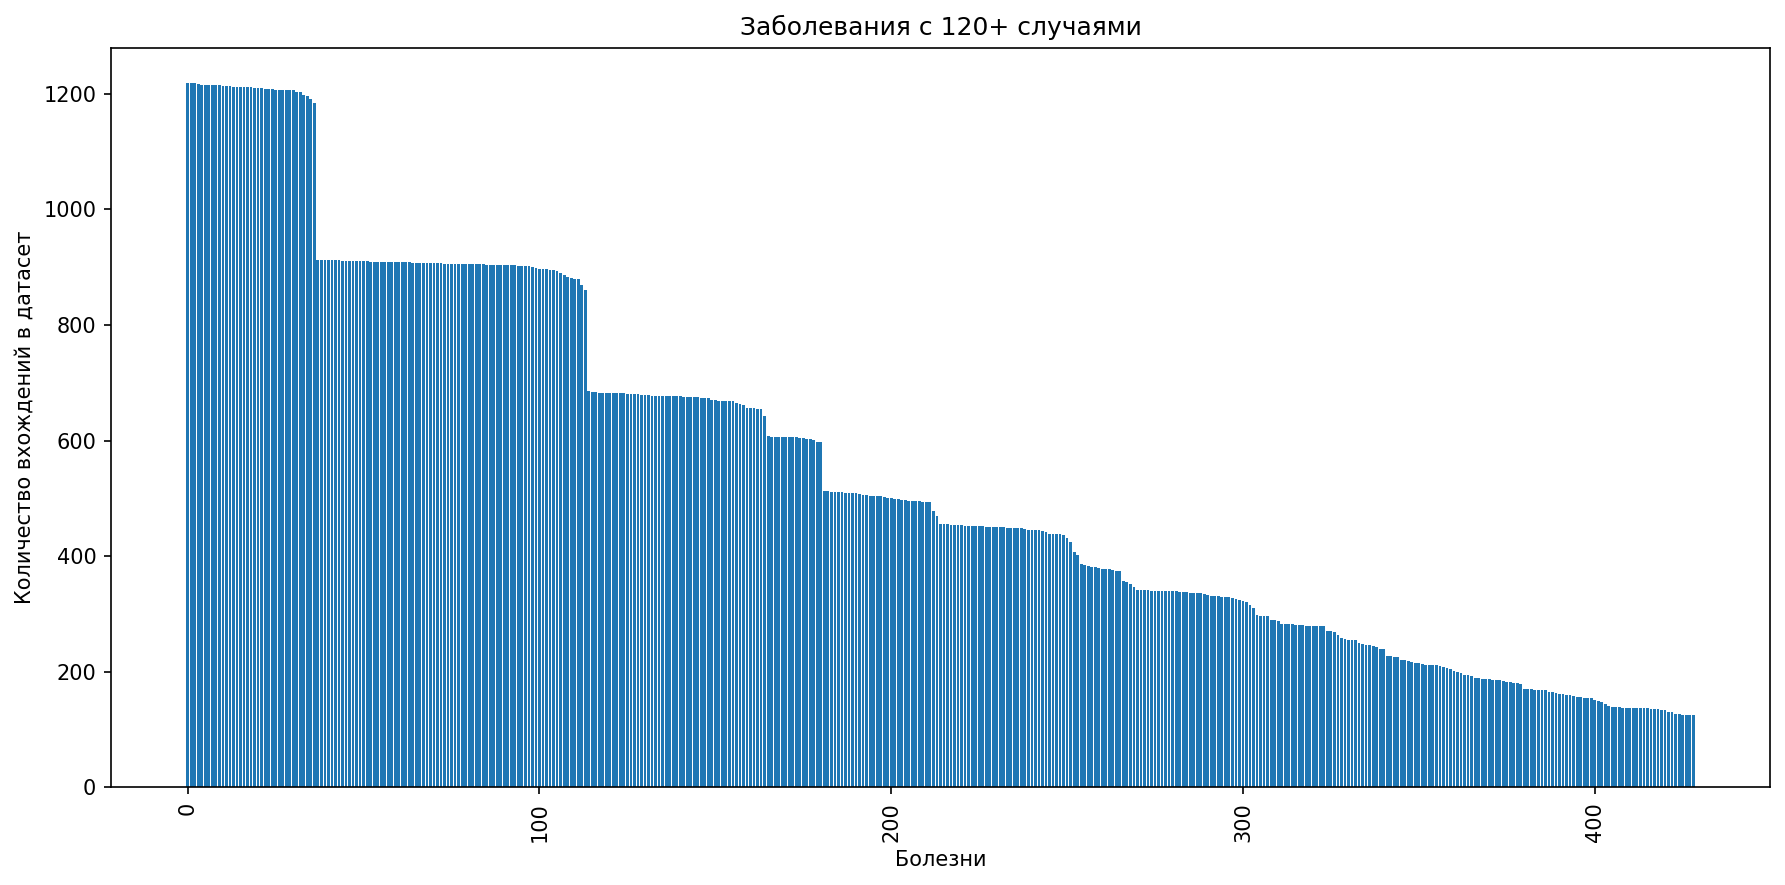

In [151]:
disease_counts_filtered = raw_dataset["diseases"].value_counts()
disease_counts_filtered = disease_counts_filtered[disease_counts_filtered >= N]

plt.figure(figsize=(12, 6), dpi=150)
plt.bar(range(len(disease_counts_filtered)), disease_counts_filtered.values)
plt.title("Заболевания с 120+ случаями")
plt.xlabel("Болезни")
plt.ylabel("Количество вхождений в датасет")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

$\text{После фильтрации датасета могли вновь появиться "нулевые" симптомы.}$

$\text{Проверим это:}$

In [153]:
zero_symptoms = filtered_dataset.iloc[:, 1:].columns[
    filtered_dataset.iloc[:, 1:].sum() == 0
]
zero_symptoms

Index(['emotional symptoms', 'elbow weakness', 'bowlegged or knock-kneed',
       'problems with shape or size of breast', 'scanty menstrual flow',
       'feeling cold', 'wrist weakness', 'low back weakness',
       'excessive growth', 'unwanted hair', 'incontinence of stool',
       'foot or toe lump or mass', 'feeling hot', 'pelvic pressure',
       'leg lump or mass', 'poor circulation', 'thirst',
       'vaginal bleeding after menopause', 'itching of scrotum',
       'muscle weakness', 'hand or finger cramps or spasms', 'skin pain',
       'ankle weakness'],
      dtype='object')

$\text{Удалим такие симптомы:}$

In [154]:
filtered_dataset = filtered_dataset.drop(columns=zero_symptoms)

$\text{Переведем названия классов и столбцов датасета на русский язык:}$

In [183]:
def rename_dataset_to_russian(dataset, diseases_file, symptoms_file):

    # Загружаем русские названия
    with open(diseases_file, "r", encoding="utf-8") as f:
        diseases_ru = [line.strip() for line in f]

    with open(symptoms_file, "r", encoding="utf-8") as f:
        symptoms_ru = [line.strip() for line in f]

    # Создаем копию датасета
    dataset_ru = dataset.copy()

    # Переименовываем заболевания
    disease_mapping = dict(zip(dataset["diseases"].unique(), diseases_ru))
    dataset_ru["diseases"] = dataset_ru["diseases"].map(disease_mapping)

    # Переименовываем столбцы
    new_disease_col = symptoms_ru[0]
    symptoms_ru_clean = symptoms_ru[1:]

    column_mapping = {"diseases": new_disease_col}
    current_symptoms = dataset.columns[1:].tolist()

    for eng, ru in zip(current_symptoms, symptoms_ru_clean):
        column_mapping[eng] = ru

    dataset_ru = dataset_ru.rename(columns=column_mapping)

    return dataset_ru


# Использование
filtered_dataset_ru = rename_dataset_to_russian(
    filtered_dataset, "current_diseases_ru.txt", "current_symptoms_ru.txt"
)

$\text{Сделаем проверки:}$

In [184]:
filtered_dataset_ru.head()

,заболевания,тревожность и нервозность,депрессия,одышка,депрессивные или психотические симптомы,острая боль в груди,головокружение,бессонница,аномальные непроизвольные движения,стеснение в груди,...,затрудненное начало мочеиспускания,покраснение горла,отек сустава,покраснение в носу или вокруг носа,морщины на коже,слабость в стопе или пальцах ног,скованность или тугоподвижность в спине,шишка или образование на запястье,низкий диурез,язва в носу
0,паническое расстройство,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,паническое расстройство,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,паническое расстройство,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,паническое расстройство,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,паническое расстройство,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [185]:
filtered_dataset_ru.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235092 entries, 0 to 246933
Columns: 305 entries, заболевания to язва в носу
dtypes: int64(304), object(1)
memory usage: 548.8+ MB


$\text{Проверка целостности:}$

In [193]:
def quick_validation(dataset_ru, original_dataset):
    print("Проверка целостности:")
    print("=" * 50)

    # Проверка размеров
    assert dataset_ru.shape == original_dataset.shape, "Размеры не совпадают!"
    print(f"Размеры совпадают: {dataset_ru.shape}")

    # Проверка количества заболеваний
    ru_diseases_count = dataset_ru.iloc[:, 0].nunique()
    original_diseases_count = original_dataset["diseases"].nunique()
    assert (
        ru_diseases_count == original_diseases_count
    ), "Количество заболеваний изменилось!"
    print(f"Количество заболеваний совпадает: {ru_diseases_count}")

    # Проверка количества симптомов
    ru_symptoms_count = dataset_ru.shape[1] - 1
    original_symptoms_count = original_dataset.shape[1] - 1
    assert (
        ru_symptoms_count == original_symptoms_count
    ), "Количество симптомов изменилось!"
    print(f"Количество симптомов совпадает: {ru_symptoms_count}")

    # Проверка на NaN в заболеваниях
    nan_diseases = dataset_ru.iloc[:, 0].isna().sum()
    assert nan_diseases == 0, f"Найдены NaN в заболеваниях: {nan_diseases}"
    print(f"NaN в заболеваниях: {nan_diseases}")

$\text{Проверка переименования:}$

In [201]:
def check_renaming(dataset_ru):
    print("\nПроверка переименования:")
    print("=" * 50)

    # Показываем первые 5 столбцов
    print("Первые 5 столбцов:")
    for i, col in enumerate(dataset_ru.columns[:5]):
        print(f"  {i+1}. {col}")

    # Показываем первые 5 заболеваний
    print("\nПервые 5 заболеваний:")
    for i, disease in enumerate(dataset_ru.iloc[:, 0].unique()[:5]):
        print(f"  {i+1}. {disease}")

    # Проверяем уникальность названий
    unique_columns = len(dataset_ru.columns) == len(set(dataset_ru.columns))
    print(
        f"\nУникальность названий столбцов: {'Соответствие' if unique_columns else 'Несоответствие'}"
    )

    # Проверяем что нет английских названий
    english_chars = any(
        any(c in "abcdefghijklmnopqrstuvwxyz" for c in col.lower())
        for col in dataset_ru.columns
    )
    print(
        f"Английские символы в названиях: {'Присутствуют' if english_chars else 'Отсутствуют'}"
    )

$\text{Проверка данных в ячейках:}$

In [202]:
def check_data_integrity(dataset_ru):
    print("\nПроверка данных в ячейках:")
    print("=" * 50)

    # Проверяем диапазон значений симптомов (должны быть 0 или 1)
    symptom_data = dataset_ru.iloc[:, 1:]
    unique_values = symptom_data.values.flatten()
    unique_values = set(unique_values[~pd.isna(unique_values)])

    print(f"Уникальные значения в симптомах: {sorted(unique_values)}")
    assert unique_values.issubset(
        {0, 1}
    ), f"Найдены недопустимые значения: {unique_values}"
    print("Все значения симптомов: 0 или 1")

    # Проверяем что есть хотя бы один симптом = 1 в каждой строке
    row_sums = symptom_data.sum(axis=1)
    zero_symptom_rows = (row_sums == 0).sum()
    print(f"Строк без симптомов: {zero_symptom_rows}")

    # Быстрая статистика
    print(f"Статистика:")
    print(f"Всего строк: {len(dataset_ru):,}")
    print(f"Симптомов на строку в среднем: {row_sums.mean():.1f}")
    print(f"Максимум симптомов в строке: {row_sums.max()}")
    print(f"Минимум симптомов в строке: {row_sums.min()}")

$\text{Заключительная сверка с файлами:}$

In [203]:
def final_check(dataset_ru, diseases_file, symptoms_file):
    print("\nЗаключительная сверка с файлами:")
    print("=" * 50)

    # Сверяем с файлом заболеваний
    with open(diseases_file, "r", encoding="utf-8") as f:
        file_diseases = set(line.strip() for line in f)

    dataset_diseases = set(dataset_ru.iloc[:, 0].unique())

    missing_in_dataset = file_diseases - dataset_diseases
    missing_in_file = dataset_diseases - file_diseases

    print(f"Заболеваний в файле: {len(file_diseases)}")
    print(f"Заболеваний в датасете: {len(dataset_diseases)}")
    print(f"Расхождений: {len(missing_in_dataset) + len(missing_in_file)}")

    if not missing_in_dataset and not missing_in_file:
        print("Заболевания полностью совпадают.")

    # Сверяем с файлом симптомов (без первого элемента - названия столбца)
    with open(symptoms_file, "r", encoding="utf-8") as f:
        file_symptoms = set(line.strip() for i, line in enumerate(f) if i > 0)

    dataset_symptoms = set(dataset_ru.columns[1:])

    print(f"\nСимптомов в файле: {len(file_symptoms)}")
    print(f"Симптомов в датасете: {len(dataset_symptoms)}")

    if file_symptoms == dataset_symptoms:
        print("Симптомы полностью совпадают")
    else:
        print("Есть расхождения в симптомах")

$\text{Произведение всех проверок:}$

In [204]:
def full_validation():
    quick_validation(filtered_dataset_ru, filtered_dataset)
    check_renaming(filtered_dataset_ru)
    check_data_integrity(filtered_dataset_ru)
    final_check(
        filtered_dataset_ru, "current_diseases_ru.txt", "current_symptoms_ru.txt"
    )
    print("Проверки завершены")


full_validation()

Проверка целостности:
Размеры совпадают: (235092, 305)
Количество заболеваний совпадает: 429
Количество симптомов совпадает: 304
NaN в заболеваниях: 0

Проверка переименования:
Первые 5 столбцов:
  1. заболевания
  2. тревожность и нервозность
  3. депрессия
  4. одышка
  5. депрессивные или психотические симптомы

Первые 5 заболеваний:
  1. паническое расстройство
  2. атрофический вагинит
  3. целлюлит или абсцесс полости рта
  4. нарушение выравнивания глаз
  5. головная боль после люмбальной пункции

Уникальность названий столбцов: Соответствие
Английские символы в названиях: Отсутствуют

Проверка данных в ячейках:
Уникальные значения в симптомах: [np.int64(0), np.int64(1)]
Все значения симптомов: 0 или 1
Строк без симптомов: 0
Статистика:
Всего строк: 235,092
Симптомов на строку в среднем: 5.4
Максимум симптомов в строке: 12
Минимум симптомов в строке: 1

Заключительная сверка с файлами:
Заболеваний в файле: 429
Заболеваний в датасете: 429
Расхождений: 0
Заболевания полностью совп

$\text{Ячейки содержат значения np.int64(0) и np.int64(1)}$

$\text{Конвертируем в int8 для экономии памяти:}$

In [206]:
# Конвертируем в int8 для экономии памяти
def optimize_memory(df):
    df_optimized = df.copy()

    # Заболевания оставляем как есть
    # Симптомы конвертируем в int8
    for col in df_optimized.columns[1:]:
        df_optimized[col] = df_optimized[col].astype(np.int8)

    return df_optimized


# Применяем оптимизацию
filtered_dataset_optimized = optimize_memory(filtered_dataset_ru)

print("Сравнение размеров памяти:")
print(
    f"До оптимизации: {filtered_dataset_ru.memory_usage(deep=True).sum() / 1024 / 1024:.1f} MB"
)
print(
    f"После оптимизации: {filtered_dataset_optimized.memory_usage(deep=True).sum() / 1024 / 1024:.1f} MB"
)

Сравнение размеров памяти:
До оптимизации: 579.6 MB
После оптимизации: 102.5 MB


$\text{Проверка на соотвествие данных:}$

In [ ]:
original_unique = set(filtered_dataset_ru.iloc[:, 1:].values.flatten())
optimized_unique = set(filtered_dataset_optimized.iloc[:, 1:].values.flatten())

print(f"Уникальные значения до: {original_unique}")
print(f"Уникальные значения после: {optimized_unique}")
print(f"Данные идентичны: {original_unique == optimized_unique}")

Уникальные значения до: {np.int64(0), np.int64(1)}
Уникальные значения после: {np.int8(0), np.int8(1)}
Данные идентичны: True


$\text{В результате проведенной работы был выполнен комплексный анализ и предобработка медицинского датасета}$ 
$\text{для создания ML-модели диагностики заболеваний. Исходный датасет содержал 773 заболевания и 377 симптомов,}$ 
$\text{однако анализ выявил значительный дисбаланс классов - от 1 до 1219 случаев на заболевание.}$

$\text{Был проведен тщательный отбор порога количества случаев заболевания, в результате которого}$ 
$\text{установлен оптимальный порог N=120 случаев. Это позволило сохранить 429 наиболее клинически значимых}$ 
$\text{заболеваний при минимальном дисбалансе 9.75:1, обеспечивающем надежное обучение модели.}$

$\text{Выполнена оптимизация данных: удалены нулевые симптомы, проведено переименование на русский язык,}$ 
$\text{типы данных сконвертированы в int8. В результате объем памяти уменьшен с 579.6 МБ до 102.5 МБ}$ 
$\text{при сохранении полной информационной ценности данных.}$

$\text{Итоговый датасет содержит 235 092 строки, 429 заболеваний и 304 симптома,}$ 
$\text{полностью подготовлен для построения высокоточных ML-моделей медицинской диагностики.}$